In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
%matplotlib notebook

In [18]:
tsne = TSNE(n_components = 3)
# pca = PCA(n_components = 3)

In [19]:
df = pd.read_csv('data/spotify_library_metadata.csv')

In [20]:
df.head()

,track_id,saved_at,track_name,primary_artist_id,all_artists,album_id,track_number,duration_ms,popularity,is_explicit,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1kcfGBb6kSrGqNIMW7rAlB,2020-07-18T20:50:52Z,Oh Devil,7sgWBYtJpblXpJl2lU5WVs,['7sgWBYtJpblXpJl2lU5WVs'],4ncZdrGiO459vrUU1yYCCA,5,217586,58,False,...,0.532,0.034500,7,0.1760,-7.188,0,0.0593,96.991,4,0.701
1,2ZjdNFPXtVdIMJeDBJBHj8,2020-07-18T20:30:35Z,Fake You,7FU0xCgmSYQEiBeevUqQ4S,['7FU0xCgmSYQEiBeevUqQ4S'],44EVGCWT8hQyf0QPLy3DOf,1,223170,47,False,...,0.606,0.133000,6,0.1070,-8.885,1,0.0582,163.942,4,0.260
2,0iOZD91DEQm3nuTEk5Bt8k,2020-07-18T14:42:22Z,Alone,5Mq7iqCWBzofK39FBqblNc,['5Mq7iqCWBzofK39FBqblNc'],6mPNjjOl2GHbP4E90l7bJe,5,216866,45,False,...,0.615,0.000001,8,0.1590,-7.339,1,0.0614,174.182,4,0.192
3,5teYCP3pROESCEaASCVf5w,2020-07-18T03:26:56Z,You're Too Precious,53KwLdlmrlCelAZMaLVZqU,['53KwLdlmrlCelAZMaLVZqU'],0hs2pdNq5QXYWsEcAFVO9q,1,223900,65,False,...,0.477,0.366000,1,0.1030,-9.458,1,0.1400,149.890,3,0.297
4,1kX5gKYWhFTiXwQxyQDYoo,2020-07-16T18:47:19Z,So Long,3jLDJWlhuDcbq1DTlWp0NM,['3jLDJWlhuDcbq1DTlWp0NM'],71pWNnr2LM2SS4wTJOavFq,5,220841,32,False,...,0.352,0.021300,0,0.0872,-10.873,0,0.0273,96.116,3,0.267


In [21]:
data = df[df.columns[7:]]

In [22]:
data.loc[:,'is_explicit'] = data.is_explicit.astype(int)
data.loc[:,'duration_ms'] = data.duration_ms.astype(float)/1000
data.rename(columns = {'duration_ms': 'duration_s'}, inplace = True)

/Users/cashewmake/Desktop/projects/atlas/atlas/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/cashewmake/Desktop/projects/atlas/atlas/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [23]:
data.head()

,duration_s,popularity,is_explicit,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,217.586,58,0,0.122,0.903,0.532,0.034500,7,0.1760,-7.188,0,0.0593,96.991,4,0.701
1,223.170,47,0,0.197,0.585,0.606,0.133000,6,0.1070,-8.885,1,0.0582,163.942,4,0.260
2,216.866,45,0,0.317,0.410,0.615,0.000001,8,0.1590,-7.339,1,0.0614,174.182,4,0.192
3,223.900,65,0,0.886,0.684,0.477,0.366000,1,0.1030,-9.458,1,0.1400,149.890,3,0.297
4,220.841,32,0,0.896,0.501,0.352,0.021300,0,0.0872,-10.873,0,0.0273,96.116,3,0.267


In [24]:
X = data.to_numpy()
s = StandardScaler()
X_scaled = s.fit_transform(X)
X_emb = tsne.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(X_emb)

In [28]:
# plt.scatter(X_emb[:,0],X_emb[:,1])
# plt.show()

<IPython.core.display.Javascript object>


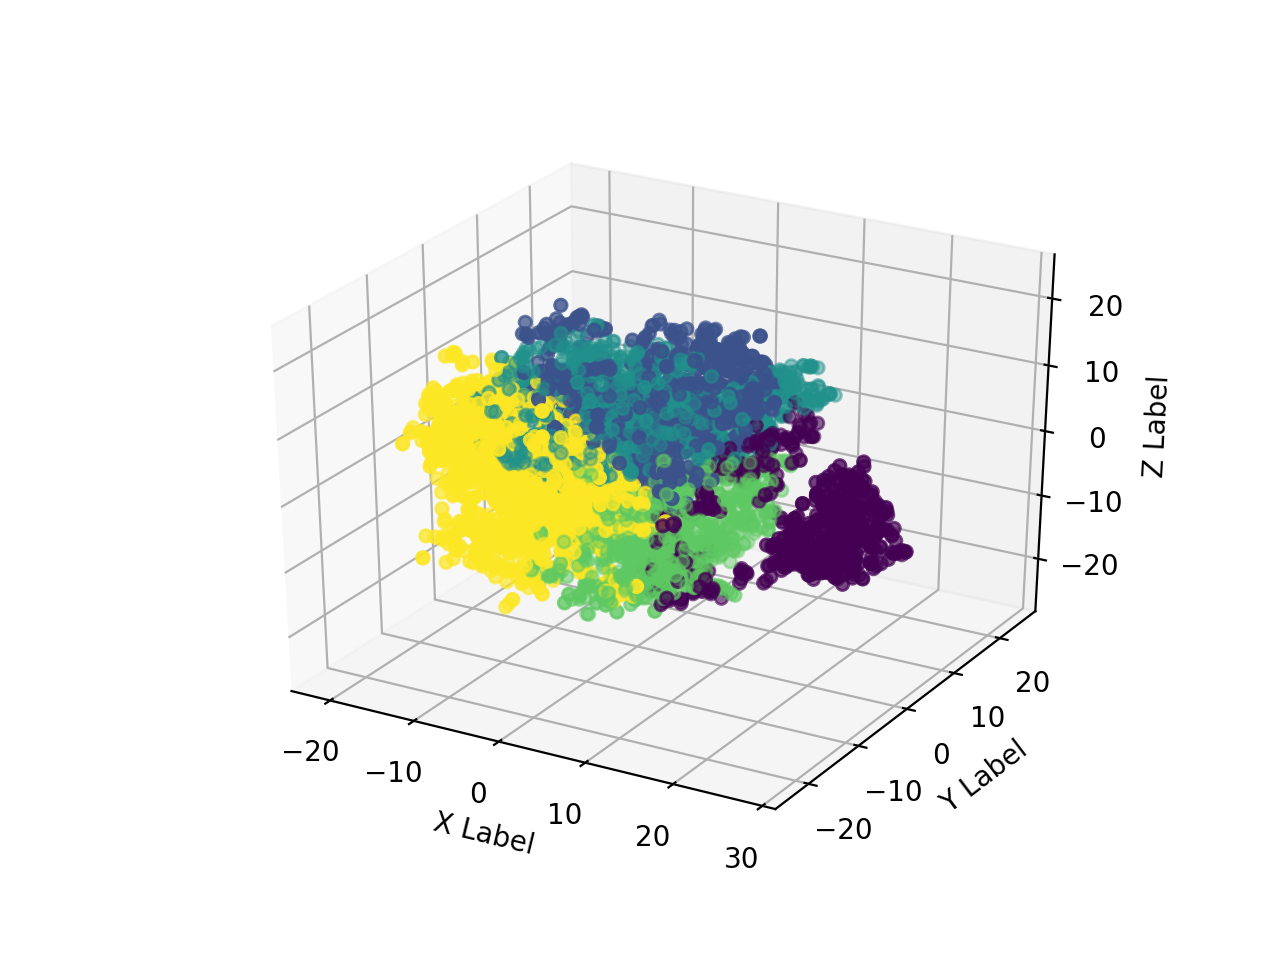

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_emb[:,0], X_emb[:,1], X_emb[:,2], c=y_pred)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()